In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Flatten the 28x28 images into 784 element vectors
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

In [3]:

# Normalize the pixel values (0-255) to the range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert the labels to categorical (one-hot encoded)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the neural network model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(784,)))  # Input layer with 784 neurons
model.add(layers.Dense(128, activation='relu'))   # Hidden layer with 128 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons (for 0-9 digits) and softmax activation

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop if no improvement for 3 epochs
    restore_best_weights=True  # Restore model weights from the epoch with the lowest validation loss
)

# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8228 - loss: 0.6667 - val_accuracy: 0.9423 - val_loss: 0.2135
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9435 - loss: 0.2021 - val_accuracy: 0.9554 - val_loss: 0.1540
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9600 - loss: 0.1408 - val_accuracy: 0.9638 - val_loss: 0.1305
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9703 - loss: 0.1046 - val_accuracy: 0.9666 - val_loss: 0.1140
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9764 - loss: 0.0847 - val_accuracy: 0.9694 - val_loss: 0.1043
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9814 - loss: 0.0679 - val_accuracy: 0.9715 - val_loss: 0.0934
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9842 - loss: 0.0571 - val_accuracy: 0.9741 - val_loss: 0.0906
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9879 - loss: 0.0458 - val_accuracy: 0.

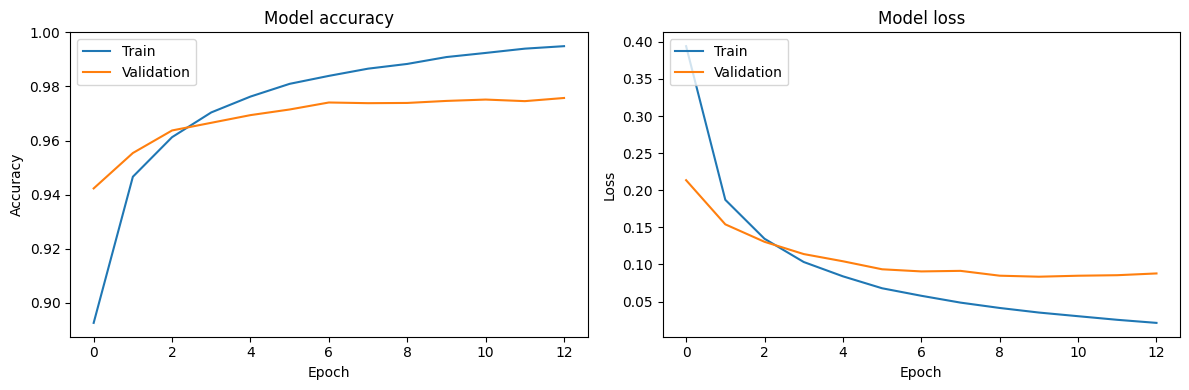

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
